# RNN(Recurrent NEural Network) 개념
- 자연어나 음성 데이터의 경우 하나의 데이터로 되어 있는 것이 아니라 연속성이 필요한 데이터기 때문에 이를 처리해야 할 상황이 생김
- h_[t] = fw(h_[t-1], x_[t])
- 위의 공식에서 아래에 각각의 W 값을 만들어주고 W와 b로 넣어주고 tanh 감싸서 식을 완성해줌
- h_[t] = tanh(W_[hh] * h_[t-1] + W_([xh]x_[t]))
- y_[t] = w_[hy] * h_[t]

# RNN 내부 구조
- input에서 n번째 data(one hot encoding)를 W_xh를 통해 hidden layer층에 도달하고 다음 hidden layer층으로 W_hh를 전달
- 그 다음 hidden layer층에서 n+1번째 data를 W_xh한 값과 결합하여 가중치를 값을 만들어내고 hidden layer를 거쳐
- 최종적으로 output layer를 구성하게 됨

# 도식화된 내부구조

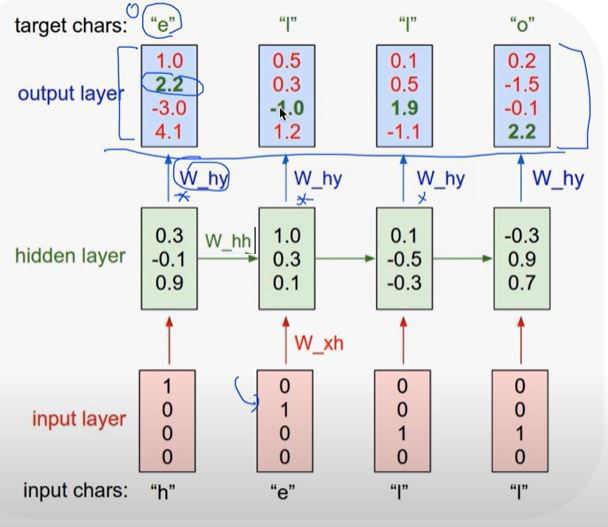

In [1]:
from PIL import Image
Image.open('RNN_img.jpg')

# RNN 실습 예제(LSTM이나 GRU 주로 씀)

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pprint

Instructions for updating:
non-resource variables are not supported in the long term


###### one hot encoding

In [3]:
h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]

# 아래 숫자의 역할
- hidden_size = hidden_size에 들어가는 input 값
- sequence_length = 구성하는 cell의 개수

In [4]:
hidden_size= 2
sequence_length = 5
batch_size = 3
pp = pprint.PrettyPrinter(width=41, compact=True)

# shape =(a, b, c) -> a = batch_size / b = sequence_length / c = hidden_size

In [5]:
x_data = np.array([[h, e, l, l, o], [e, e, h, l, o], [l, h, o, l, h]], dtype=np.float32)
print(x_data.shape)
pp.pprint(x_data)

(3, 5, 4)
array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]]], dtype=float32)


In [6]:
# cell = tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=hidden_size)
cell = tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True)

C:\Users\since\anaconda3\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:699: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be "


In [7]:
outputs, _states = tf.compat.v1.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\since\anaconda3\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [8]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [9]:
pp.pprint(outputs.eval())

array([[[-0.03316401,  0.03665221],
        [-0.11394268,  0.18149213],
        [-0.01592381,  0.07207077],
        [ 0.09410116,  0.0169984 ],
        [ 0.15062417, -0.10305954]],

       [[-0.099005  ,  0.14359286],
        [-0.16005255,  0.26003855],
        [-0.17164773,  0.21368413],
        [-0.02757512,  0.12549849],
        [ 0.09965906,  0.05493841]],

       [[ 0.09699513, -0.04701715],
        [ 0.02454402, -0.02067582],
        [ 0.10916426, -0.13002375],
        [ 0.17091034, -0.14408876],
        [ 0.06326544, -0.12671834]]], dtype=float32)
